In [1]:
%load_ext autoreload
%autoreload 1
%aimport general_functions, plotting_functions, hamiltonians
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hamiltonians import hamiltonian_3QD_1HH
from general_functions import compute_eigensystem
from plotting_functions import modify_plot, save_figure

In [3]:
hbar = 4.1357*10**-15  # Hbar (ueV*ns)
g = 1.35  # g-factor fo the GaAs
muB = 57.883  # Bohr magneton (ueV/T)
B = 0.015  # Magnetic field applied (T)
ET = g * muB * B  # Zeeman splitting (ueV)
l1 = 0.001  # Spin-flip tunneling (ueV)
l2 = 0.1  # Spin-flip tunneling (ueV)
tau = 0.25  # Spin-conserving (ueV)
u = 2000  # Intradot interaction (ueV)

In [4]:
n1=10**3
n2=10**3

limit_eps=4
eps_vector = np.linspace(-limit_eps, limit_eps, 10**4) * ET

min_tau=0
max_tau=2
tau=np.linspace(min_tau,max_tau,n1)

l2=tau*0.4
l1=l2/100

hypermatrix=np.zeros([n1,n2,6,6],dtype=complex)

for i in range (0,n1):
    for j in range (0,n2):
        parameters=[0,0,0,0, tau[i],tau[j], l2[i],l2[j]]
        hypermatrix[i,j]=hamiltonian_3QD_1HH(*parameters)

In [5]:
energies,states = compute_eigensystem(parameters, hamiltonian_3QD_1HH, hypermatrix=hypermatrix)

In [6]:
population_middle=np.abs(states[:,:,2,:])**2+np.abs(states[:,:,3,:])**2

In [7]:
np.shape(population_middle)

(1000, 1000, 6)

In [8]:
tf = 10
tau = tf / 6
sigma = tf / 6
t = np.linspace(0, tf, 1000)
gamma0=0.7

gamma1 = gamma0*np.exp(-(t - tf / 2 - tau) ** 2 / sigma ** 2)
gamma2 = gamma0*np.exp(-(t - tf / 2 + tau) ** 2 / sigma ** 2)

<IPython.core.display.Javascript object>


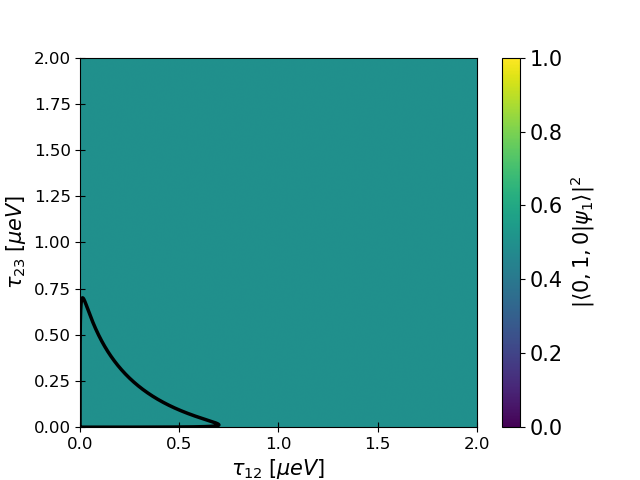

<IPython.core.display.Javascript object>


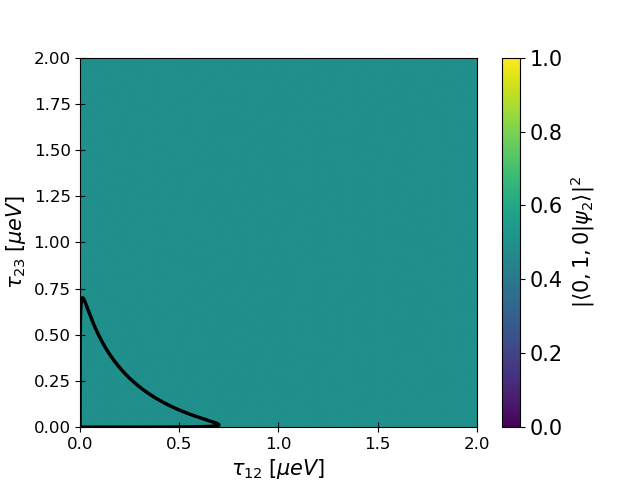

<IPython.core.display.Javascript object>


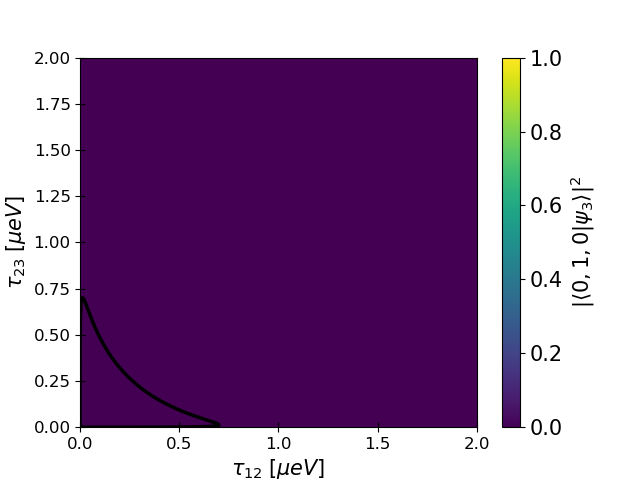

<IPython.core.display.Javascript object>


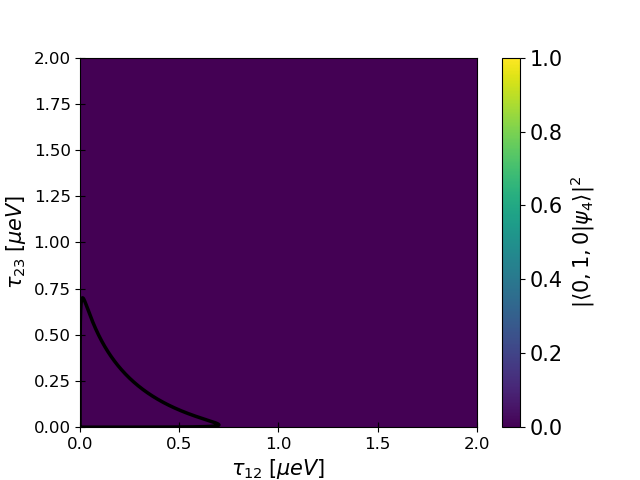

<IPython.core.display.Javascript object>


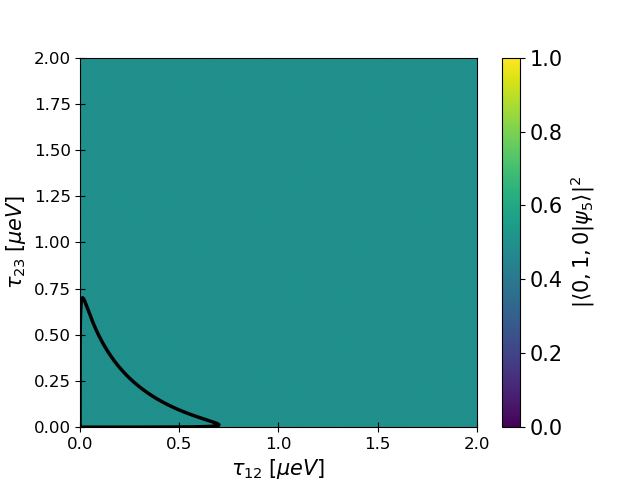

<IPython.core.display.Javascript object>


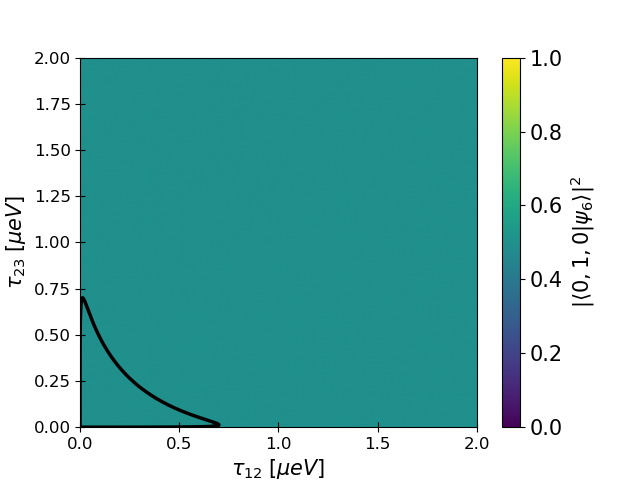

In [9]:
for i in range (0,6):
    # ax=axis[i]
    fig, ax = plt.subplots()
    pos=ax.imshow(population_middle[:,:,i].transpose(),aspect='auto',origin='lower',
               extent=[min_tau,max_tau,min_tau,max_tau], vmax=1, vmin=0)
    ax.set_xlabel(r'$\tau_{12}\; [\mu eV]$')
    ax.set_ylabel(r'$\tau_{23} \; [\mu eV]$')
    cbar=fig.colorbar(pos, ax=ax,)
    cbar.set_label(r'$|\langle0,1,0|\psi_'+str(i+1)+r'\rangle|^2$', fontsize=15)
    cbar.ax.tick_params(labelsize=15)
    ax.plot(gamma1, gamma2, color='black')
    
    modify_plot(ax, tick_direction='inout',label_size=15, tick_label_size=12)
    #save_figure(fig,'occupation_middle_state',device='desktop')